In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tqdm import tqdm 
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
from scipy.interpolate import interp1d
import os
import glob
from labellines import *
import math
from PIL import Image

divergent=LinearSegmentedColormap.from_list('divergent', (
    # Edit this gradient at https://eltos.github.io/gradient/#0D7D87-99C6CC-FBFBFB-EE9093-C31E23
    (0.000, (0.051, 0.490, 0.529)),
    (0.250, (0.600, 0.776, 0.800)),
    (0.500, (0.984, 0.984, 0.984)),
    (0.750, (0.933, 0.565, 0.576)),
    (1.000, (0.765, 0.118, 0.137))))

my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:0D7D87-20.8:99C6CC-40:B6B66B-60:F47A00-80:EE9093-100:C31E23
    (0.000, (0.051, 0.490, 0.529)),
    (0.208, (0.600, 0.776, 0.800)),
    (0.400, (0.714, 0.714, 0.420)),
    (0.600, (0.957, 0.478, 0.000)),
    (0.800, (0.933, 0.565, 0.576)),
    (1.000, (0.765, 0.118, 0.137))))
#Formatting for plots
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('bmh')
# DiscModel is in a different file
from src.DiscModel import DiscGalaxy
N = 1000000 # number of stars in the disc
a = 1 # a is the scale length of the disc in kpc
D = DiscGalaxy(N=N,a=a)

rmax = 212.
nbins = 64
mmax = 10
nmax = 10

noise = 0.5

"""Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes."""

'Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes.'

Image size: 424x424 pixels


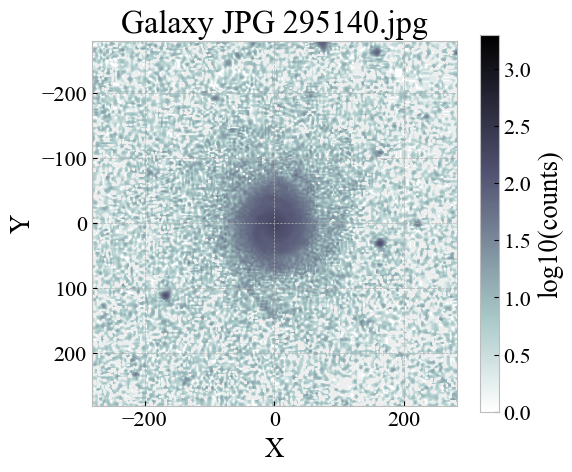

Amn (rows = n, columns = m):
[[4024.711  173.56   103.205   31.224   41.836   24.494   30.636   15.886
    20.608   16.016   21.142]
 [1796.103   58.171  245.888   49.754   96.884    6.757   16.564   27.753
    19.864   38.439   41.873]
 [ 338.915   11.359  186.244   36.446   82.574   62.794   37.5     17.167
    49.921   30.757   31.452]
 [ 301.815   59.286  112.642   59.844   33.836   37.849   12.481   49.137
    39.991   35.512   16.17 ]
 [ 698.413   31.075   32.074   53.387   92.356   21.519   64.906   26.103
    65.263   38.343   44.542]
 [ 401.252   45.732   99.146   65.005   93.636   46.797   81.261    5.371
    65.993   27.178   48.603]
 [ 338.54    60.669   66.223   53.45   194.969   68.023   26.377   26.228
    17.756   30.638   29.917]
 [ 377.544   36.912   95.823   53.315   67.468   36.59    70.574   37.209
    50.711   19.15    42.072]
 [  70.53    38.192   66.328   44.193  215.569   38.306   31.616   39.155
   105.504   55.852   33.232]
 [  23.461   44.409   61.372   46.4

Processing inclinations: 100%|██████████| 8/8 [05:08<00:00, 38.53s/inclination]

0.12769187815317376 0.00145375422426694



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=np.float64(0.010713272432419929), xmax=np.float64(0.010713272432419985), xval=0.15507249385578858). Clipping it into the allowed range.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 1 in `xvals` is outside the range of its associated line (xmin=np.float64(0.044791909021122234), xmax=np.float64(0.044791909021122345), xval=0.2931552273911847). Clipping it into the allowed range.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=np.float64(0.10541030898078446), xmax=np.float64(0.10541030898078457), xval=0.4312379609

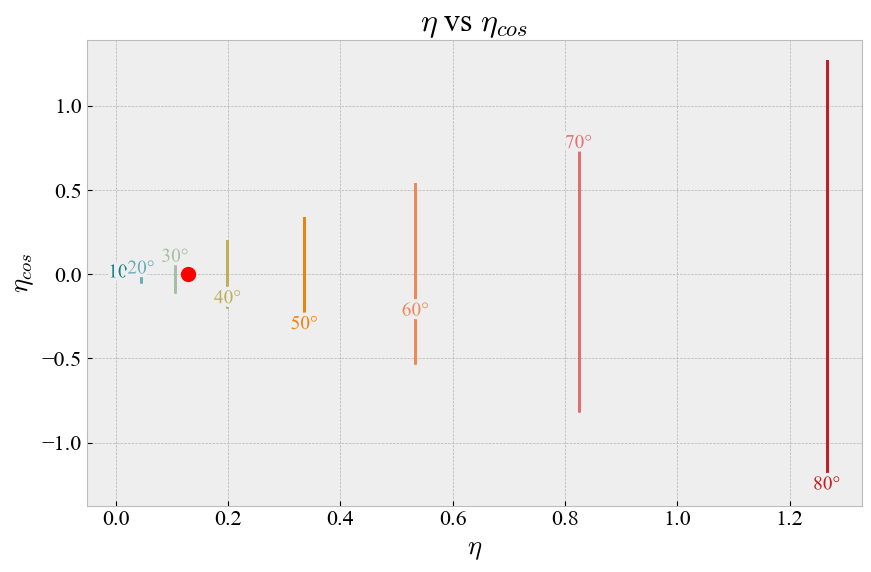

In [2]:
file="295140.jpg"  # replace with your image file
rmax = 281  # radius in pixels, adjust as needed
img_pil = Image.open(file).convert("L")
w, h    = img_pil.size
print(f"Image size: {w}x{h} pixels")
img_incl = np.array(img_pil, dtype=float)

x_edges = np.linspace(-rmax, rmax, w)
y_edges = np.linspace(rmax, -rmax, h)

safe     = np.where(img_incl>0, img_incl, np.nan)
log_img  = np.log10(safe)

plt.figure(figsize=(6,5))
plt.imshow(
    log_img, cmap="bone_r",
    extent=[x_edges[0],x_edges[-1],y_edges[0],y_edges[-1]],
    vmin=0, vmax=3.3
)
plt.colorbar(label="log10(counts)")
plt.title(f"Galaxy JPG {file}")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

D = DiscGalaxy(N=N, a=a)
D.img     = img_incl
D.x_edges = x_edges
D.y_edges = y_edges
D.x_centers = x_edges
D.y_centers = y_edges


E1 = D.make_expansion(mmax, nmax, 20, noisy=False)
E1.laguerre_reconstruction(D.r, D.p)



coscoefstrue = E1.coscoefs
sincoefstrue = E1.sincoefs

Amn = np.sqrt(coscoefstrue**2 +sincoefstrue**2) 

Amn_matrix = Amn.T 

print("Amn (rows = n, columns = m):")
print(np.round(Amn_matrix,3)) 


# the grid of inclinations to draw curves for:
incl_list = np.linspace(10, 80, 8)     # eight sample inclinations
PA_list   = np.linspace(0, 180, 20)     # fine PA sampling
colorindx = np.linspace(0, 1, len(incl_list+1))  # color index for inclinations
plt.figure(figsize=(9, 6))

i=0

for inc in tqdm(incl_list, desc="Processing inclinations", unit="inclination"):
    etas      = []
    eta_cos = []
    for PA in PA_list:
        # generate the galaxy
        D = DiscGalaxy(N=N, a=a)
        D.rotate_disc(inc, 0, PA)
        D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
        E = D.make_pointexpansion(mmax, nmax, 20)

        c = E.coscoefs; s = E.sincoefs

        num_cos = sum(c[2,n] for n in range(nmax))
        num_sin = sum(s[2,n] for n in range(nmax))
        num     = sum(np.hypot(c[2,n], s[2,n]) for n in range(nmax))
        den     = sum(abs(c[0,n])            for n in range(nmax))

        eta     = num/den if den else np.nan
        etacos  = num_cos/den if den else np.nan
        

        etas.append(eta)
        eta_cos.append(etacos) 

    # plot one curve (inc fixed, PA varying)
    plt.plot(etas, eta_cos, '-', label=f"{inc:.0f}°", color=my_gradient(colorindx[i]))
    i += 1
    
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\eta_{cos}$")
labelLines(plt.gca().get_lines(),align=False,fontsize=14)
plt.title(r"$\eta$ vs $\eta_{cos}$")
plt.grid(True)

# now do the blind test and overplot a big marker


num_cos = sum(coscoefstrue[2,n] for n in range(nmax))

num     = sum(np.hypot(coscoefstrue[2,n], sincoefstrue[2,n]) for n in range(nmax))
den     = sum(abs(coscoefstrue[0,n])            for n in range(nmax))

eta_bt     = num/den
eta_cos_bt = num_cos/den


# big red dot
plt.plot(eta_bt, eta_cos_bt, 'o', color='red', markersize=10, label="Blind Test")
print(eta_bt, eta_cos_bt)
plt.tight_layout()
plt.show()



Image size: 424x424 pixels, radius=60 pixels


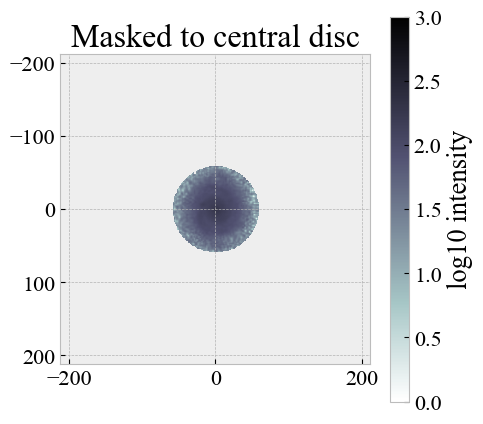

Processing scale lengths:  10%|█         | 1/10 [00:00<00:05,  1.75scale length/s]

Processing a=5 kpc, A00=2881.352, A10=3024.935


Processing scale lengths:  20%|██        | 2/10 [00:01<00:04,  1.82scale length/s]

Processing a=6 kpc, A00=3286.382, A10=3247.861


Processing scale lengths:  30%|███       | 3/10 [00:01<00:03,  1.84scale length/s]

Processing a=7 kpc, A00=3647.743, A10=3369.340


Processing scale lengths:  40%|████      | 4/10 [00:02<00:03,  1.87scale length/s]

Processing a=8 kpc, A00=3967.875, A10=3397.588


Processing scale lengths:  50%|█████     | 5/10 [00:02<00:02,  1.87scale length/s]

Processing a=9 kpc, A00=4249.184, A10=3344.133


Processing scale lengths:  60%|██████    | 6/10 [00:03<00:02,  1.87scale length/s]

Processing a=10 kpc, A00=4494.251, A10=3222.382


Processing scale lengths:  70%|███████   | 7/10 [00:03<00:01,  1.85scale length/s]

Processing a=11 kpc, A00=4705.844, A10=3046.103


Processing scale lengths:  80%|████████  | 8/10 [00:04<00:01,  1.88scale length/s]

Processing a=12 kpc, A00=4886.838, A10=2828.299


Processing scale lengths:  90%|█████████ | 9/10 [00:04<00:00,  1.89scale length/s]

Processing a=13 kpc, A00=5040.115, A10=2580.548


Processing scale lengths: 100%|██████████| 10/10 [00:05<00:00,  1.87scale length/s]

Processing a=14 kpc, A00=5168.480, A10=2312.730
9 [np.float64(1.0498317031449893), np.float64(0.9882785194657205), np.float64(0.9236778266099686), np.float64(0.8562739133727594), np.float64(0.7870060478494998), np.float64(0.7170010258734449), np.float64(0.6473022361712842), np.float64(0.5787584587488598), np.float64(0.5120018895846538), np.float64(0.44746811193953506)]
Minimum ratio 0.447 found for a = 14.0 kpc


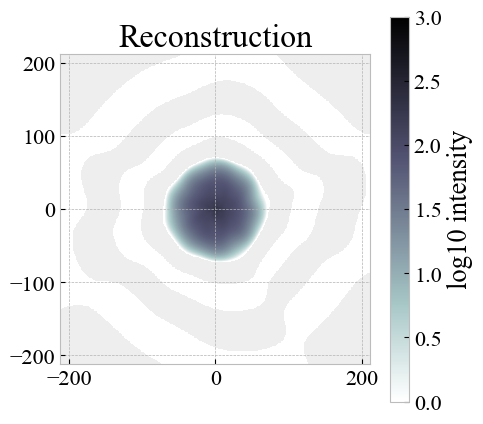

Amn (rows = n, columns = m):
[[5168.  229.  120.   40.   55.   34.   44.   17.   26.   17.   22.]
 [2313.  104.  286.   59.  129.   31.   51.   41.   30.   42.   38.]
 [ 159.   71.  226.   34.   55.   36.   26.   29.   76.   27.   16.]
 [ 723.   36.  176.   58.   85.   13.    4.   28.   19.   17.   25.]
 [ 206.   37.   83.   34.  152.   35.   30.   20.   21.   31.    3.]
 [ 236.   21.  152.   27.  166.   37.   28.   22.   22.   12.   18.]
 [ 215.   31.   84.   54.  115.   22.   17.   12.   55.   21.   22.]
 [   7.   38.   26.   52.   64.   17.   33.   11.   75.   37.   13.]
 [ 110.   19.   55.   24.   61.   28.   33.   16.   67.   26.    4.]
 [  80.   35.   47.   13.   83.   33.   19.   11.   49.    4.   12.]]
reconimg= 646054.9999999999
Sum= 1549047.0 (424, 424)


Processing inclinations: 100%|██████████| 30/30 [01:36<00:00,  3.22s/inclination]

0.1359152365932863 0.0005210015705409834



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=np.float64(0.045838278158139734), xmax=np.float64(0.04583827815813987), xval=0.0701913609687487). Clipping it into the allowed range.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 1 in `xvals` is outside the range of its associated line (xmin=np.float64(0.04577116223774538), xmax=np.float64(0.04577116223774541), xval=0.09135208179379316). Clipping it into the allowed range.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=np.float64(0.04571759799432862), xmax=np.float64(0.045717597994328646), xval=0.112512802618

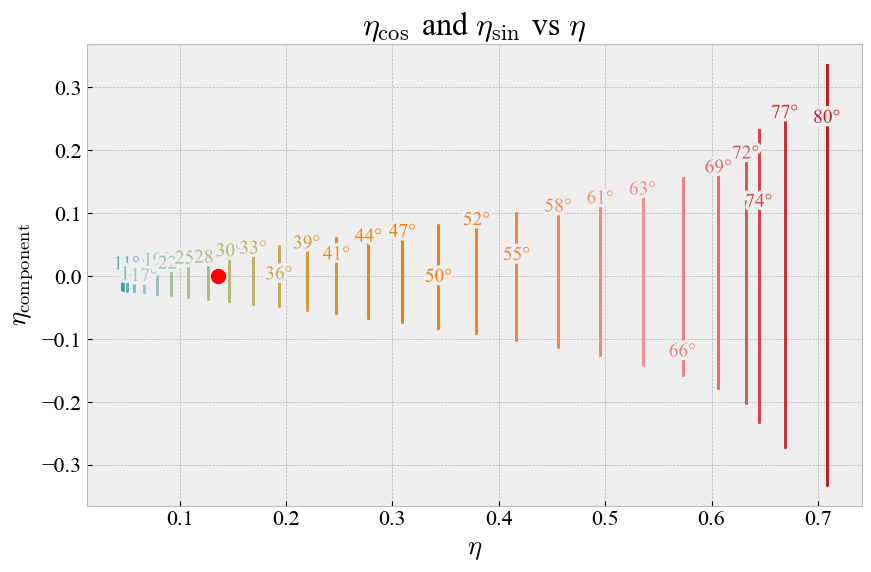

In [ ]:
N=100000

#Load the image as a 2D float array
file = "295140.jpg"
gray = np.array(Image.open(file).convert("L"), dtype=float)  # shape (h, w)

h, w = gray.shape
cx, cy = w//2, h//2
radius = 60 # in pixels
print(f"Image size: {w}x{h} pixels, radius={radius} pixels")
rmax= h//2
# Build the circular mask
y, x = np.indices((h,w))
mask = (x - cx)**2 + (y - cy)**2 <= radius**2
x_edges = np.linspace(-rmax, rmax, w)
y_edges = np.linspace(rmax, -rmax, h)

# Apply it: keep the disc, zero (or nan) outside
disc_only = np.where(mask, gray, 0.0)

#Quick check that only the central disc remains
plt.figure(figsize=(5,5))
plt.imshow(np.log10(np.where(disc_only>0, disc_only, np.nan)), extent=[x_edges[0],x_edges[-1],y_edges[0],y_edges[-1]],
           cmap='bone_r',
           vmin=0, vmax=3)
plt.colorbar(label='log10 intensity')
plt.title("Masked to central disc")
plt.show()

#feed into original DiscGalaxy pipeline
  # physical half‐width of the image
# set up your grid exactly as before:
x_edges = np.linspace(-rmax, rmax, w+1)
y_edges = np.linspace(-rmax, rmax, h+1)
x_centers = 0.5*(x_edges[:-1] + x_edges[1:])
y_centers = 0.5*(y_edges[:-1] + y_edges[1:])

a_array=np.arange(5,15,1)
ratio_list=[]
for a in tqdm(a_array, desc="Processing scale lengths", unit="scale length"):
    D = DiscGalaxy(N=N,a=a,M=np.sum(gray))       # no N needed
    D.img       = disc_only.T   # transpose → shape = (nx, ny)
    D.x_edges   = x_edges
    D.y_edges   = y_edges
    D.x_centers = x_centers
    D.y_centers = y_centers

    mmax, nmax = 10, 10
    E1 = D.make_expansion(mmax, nmax, a, noisy=False)
    E1.laguerre_reconstruction(D.r, D.p)
    
    c1 = E1.coscoefs; s1 = E1.sincoefs
    Amn = np.sqrt(E1.coscoefs**2 +E1.sincoefs**2) 
    Amn_matrix = Amn.T
    A00=Amn_matrix[0,0]
    A10=Amn_matrix[1,0]
    print(f"Processing a={a} kpc, A00={A00:.3f}, A10={A10:.3f}")
    ratio=np.abs(A10/A00)
    ratio_list.append(ratio)

min_ratio = min((ratio_list))
min_index = ratio_list.index(min_ratio)
print(min_index, ratio_list)
print(f"Minimum ratio {min_ratio:.3f} found for a = {a_array[min_index]:.1f} kpc")

a=a_array[min_index]
D = DiscGalaxy(N=N,a=a)       # no N needed
D.img       = disc_only.T   # transpose → shape = (nx, ny)
D.x_edges   = x_edges
D.y_edges   = y_edges
D.x_centers = x_centers
D.y_centers = y_centers

# Expand & reconstruct 
mmax, nmax = 10, 10
E1 = D.make_expansion(mmax, nmax, a, noisy=False)
E1.laguerre_reconstruction(D.r, D.p)
# Histogram 
X2, Y2   = np.meshgrid(x_centers, y_centers, indexing='ij')
x_flat   = X2.ravel();     y_flat   = Y2.ravel()
w_flat   = E1.reconstruction.ravel()

recon_img, _, _ = np.histogram2d(
    x_flat, y_flat,
    bins=[x_edges, y_edges],
    weights=w_flat
)
counts, _, _ = np.histogram2d(
    x_flat, y_flat,
    bins=[x_edges, y_edges]
)
recon_img = recon_img / np.maximum(counts, 1)
recon_img *= np.sum(disc_only) / np.sum(recon_img)
recon_img = recon_img.T

plt.figure(figsize=(5,5))
plt.imshow(np.log10(np.where(recon_img>0, recon_img, np.nan)), cmap='bone_r',
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
           vmin=0, vmax=3)
plt.colorbar(label='log10 intensity')
plt.title("Reconstruction")
plt.show()
np.set_printoptions(suppress=True) 
c1 = E1.coscoefs; s1 = E1.sincoefs
Amn = np.sqrt(E1.coscoefs**2 +E1.sincoefs**2) 
Amn_matrix = Amn.T 
print(f"Amn (rows = n, columns = m):")
print(np.round(Amn_matrix,0)) 

print('reconimg=',np.sum(recon_img))
print('Sum=',np.sum(gray),gray.shape)

# the grid of inclinations to draw curves for:
incl_list = np.linspace(0, 80, 30)     # eight sample inclinations
PA_list   = np.linspace(0, 180, 18)     # fine PA sampling
colorindx = np.linspace(0, 1, len(incl_list+1))  # color index for inclinations
plt.figure(figsize=(9, 6))

i=0
eta_avg_list=[]
for inc in tqdm(incl_list, desc="Processing inclinations", unit="inclination"):
    etas = []
    eta_cos_list = []
    eta_sin_list= []
    for PA in PA_list:
        # generate the galaxy
        D = DiscGalaxy(N=N, a=a, M=np.sum(gray))
        D.rotate_disc(inc, 0, PA)
        D.generate_image(rmax=rmax, nbins=h, noiselevel=noise)
        E = D.make_pointexpansion(mmax, nmax, a) #### infinite limit

        costheta = np.cos(np.radians(inc))
        coscoefs = E.coscoefs
        sincoefs = E.sincoefs

        # Compute sums
        num_cos = sum((coscoefs[2, n]) for n in range(nmax))
        num_sin = sum((sincoefs[2, n]) for n in range(nmax))
        num = sum(np.sqrt(coscoefs[2, n]**2 + sincoefs[2, n]**2) for n in range(nmax))
        denom = sum(np.sqrt(coscoefs[0, n]**2) for n in range(nmax))

        # Avoid divide-by-zero
        eta = num / denom if denom != 0 else np.nan
        eta_cos = num_cos / denom if denom != 0 else np.nan
        eta_sin = num_sin / denom if denom != 0 else np.nan

        etas.append(eta)
        eta_sin_list.append(eta_sin) 
        eta_cos_list.append(eta_cos)
    eta_avg=np.mean(etas)
    eta_avg_list.append(eta_avg)
    plt.plot(etas, eta_cos_list, '-', label=f"{inc:.0f}°", color=my_gradient(colorindx[i]))
    #plt.plot(etas, eta_sin_list, '--', label=f"{inc:.0f}° (sin)")
    i += 1
    
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\eta_{\text{component}}$")
labelLines(plt.gca().get_lines(),align=False,fontsize=14)
plt.title(r"$\eta_{\cos}$ and $\eta_{\sin}$ vs $\eta$")
plt.grid(True)
# now do the blind test and overplot a big marker

num_sin = sum(s1[2,n] for n in range(nmax))
num_cos = sum(c1[2,n] for n in range(nmax))

num     = sum(np.hypot(c1[2,n], s1[2,n]) for n in range(nmax))
den     = sum(abs(c1[0,n])            for n in range(nmax))

eta_bt     = num/den
eta_cos_bt = num_cos/den
eta_sin_bt = num_sin/den

# big red dot
plt.plot(eta_bt, eta_cos_bt, 'o', color='red', markersize=10, label="Blind Test")
print(eta_bt, eta_cos_bt)
plt.tight_layout()
plt.show()


Fitted parameters: A=0.402681291326463, B=-1.8002613122532218, C=3.372156386077396, D=0.4474219638440071
0.1359152365932863 29.18117568347993
0.1359152365932863 29.18117568347993


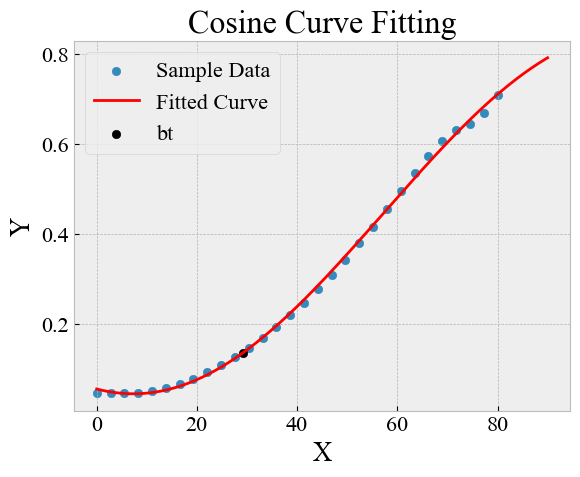

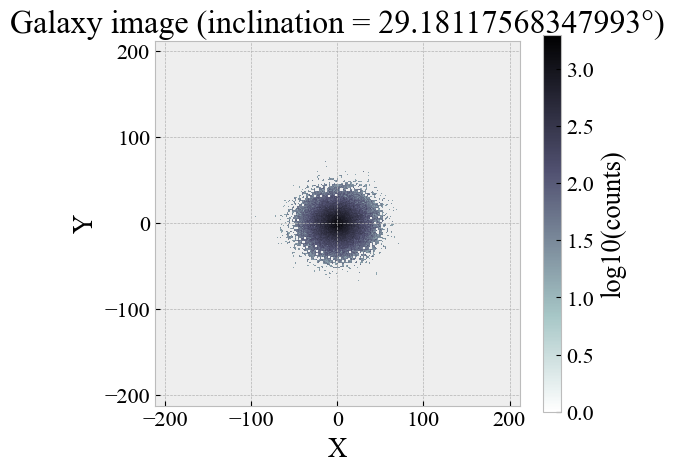

Amn inc= 80.0 (rows = n, columns = m):
[[18806.   154.  1239.    96.   534.   120.   215.    59.   119.   248.
    175.]
 [  896.   165.   951.    20.   652.    98.   106.    45.    96.   110.
    137.]
 [   54.   170.    99.   100.   547.    75.   118.    27.   123.    81.
    112.]
 [    9.   110.   100.    99.   614.    34.   101.    55.   150.    72.
     81.]
 [   23.    16.   115.   108.   704.    59.   113.    70.   213.    52.
     79.]
 [   48.    85.    88.   134.   770.    79.   143.    59.   310.    59.
     87.]
 [   54.   164.    52.   143.   811.    81.   171.    89.   424.    84.
     82.]
 [   46.   205.    22.   122.   835.    84.   187.   129.   532.   108.
     71.]
 [   32.   214.     9.    87.   838.    91.   180.   155.   609.   121.
     76.]
 [   19.   202.    18.    54.   823.   103.   155.   157.   640.   123.
     96.]]
Amn difference (rows = n, columns = m):
[[-13637.     75.  -1119.    -56.   -479.    -86.   -171.    -42.    -93.
    -230.   -153.]
 [  141

Text(0.5, 1.0, 'Amn difference Simulation vs Image')

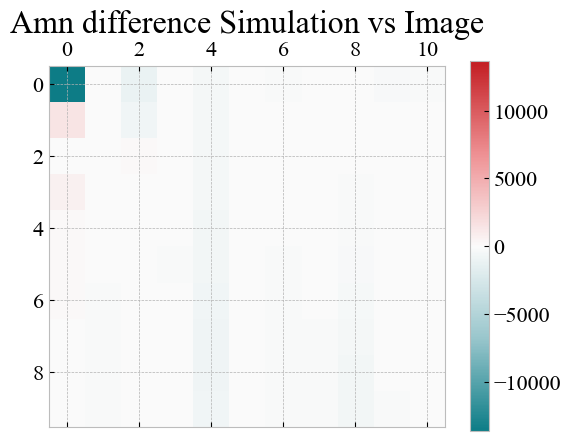

In [ ]:
def cos_function(x, A, B, C, D):

    return A *np.cos(B * np.radians(x) + C) + D

# Initial guess for the parameters [A, B, C, D]
initial_guess = [7.7, 0.01, 2*np.pi, 0]

# Perform the curve fitting
params, covariance = curve_fit(cos_function, incl_list, eta_avg_list, p0=initial_guess)

# Extract the fitted parameters
A_fit, B_fit, C_fit, D_fit = params

print(f"Fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")
# Generate y values using the fitted parameters
inc_fit = np.linspace(0.0, 90, 500)
eta_fit = cos_function(inc_fit, A_fit, B_fit, C_fit, D_fit)


# Plot the original data and the fitted curve
plt.scatter(incl_list, eta_avg_list, label='Sample Data')
plt.plot(inc_fit, eta_fit, label='Fitted Curve', color='red')
plt.xlabel('X')
plt.ylabel('Y')


def FindInc(eta, A, B, C, D):
    inside = np.clip((eta - D) / A, -1.0, 1.0)
    theta1 = (np.arccos(inside) - C) / B
    theta2 = (-np.arccos(inside) - C) / B
    deg1 = np.rad2deg(theta1)
    deg2 = np.rad2deg(theta2)
    # Return value in [0, 90]
    valid = [deg for deg in (deg1, deg2) if -90<= deg <= 180]
    print(f"Valid inclinations: {valid}", deg1, deg2)
    return valid[0] if valid else np.nan 

def FindInc2(eta, A, B, C, D):
    return np.rad2deg(np.arccos((np.clip((eta - D) / A, -1.0, 1.0)))-C) / B

    
inc_bt=FindInc2(eta_bt,A_fit,B_fit,C_fit,D_fit)
print(eta_bt,inc_bt)
plt.scatter(inc_bt,eta_bt, color='black',label='bt')
print(eta_bt, inc_bt)
plt.title('Cosine Curve Fitting')
plt.legend()
plt.show()


PA=0
D = DiscGalaxy(N=N, a=a, M=np.sum(gray))  # adjust N and a as needed
D.rotate_disc(inc_bt, 0, PA)
D.generate_image(rmax=rmax, nbins=h, noiselevel=noise)
img_orig = D.img.copy()

safe_img = np.where(D.img > 0, D.img, np.nan)
log_img = np.log10(safe_img)


"""Plotting the galaxy image"""

plt.figure(figsize=(6, 5))
plt.imshow(log_img, origin='lower', cmap='bone_r',
        extent=[D.x_edges[0], D.x_edges[-1], D.y_edges[0], D.y_edges[-1]], vmin=0, vmax=3.3)
plt.colorbar(label='log10(counts)')
plt.title(f"Galaxy image (inclination = {inc_bt}°)")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()



E1 = D.make_expansion(mmax,nmax,a,noisy=False) # Expanding the image 
c = E1.coscoefs; s = E1.sincoefs
Amndisc = np.sqrt(E1.coscoefs**2 +E1.sincoefs**2) 
Amndisc_matrix = Amndisc.T 
print(f"Amn inc= {inc} (rows = n, columns = m):")
print(np.round(Amndisc_matrix,0)) 


figure = plt.figure()
axes = figure.add_subplot(111)
Amndiff=Amn_matrix-Amndisc_matrix
print("Amn difference (rows = n, columns = m):")
print(np.round(Amndiff,0))


limit=max(Amndiff.max(), -Amndiff.min())
norm = colors.TwoSlopeNorm(
    vmin=min(limit,-limit),   # most negative maps to one end
    vcenter=0,            # zero maps to center (white)
    vmax=max(limit,-limit)    # most positive maps to the other end
)

caxes = axes.matshow(Amndiff, interpolation ='nearest',norm=norm, cmap=divergent)
figure.colorbar(caxes)

axes.set_title(f"Amn difference Simulation vs Image")



<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
/var/folders/hk/kt8z304n2n11x6tfqk2bmsmw0000gp/T/ipykernel_76316/1699324357.py:8: SyntaxWarning: invalid escape sequence '\e'
  """ eta_avg_list=[]


Estimated PA from blind test: -166.6487585191899,58.3 for eta_cos=0.001, eta_sin=0.008


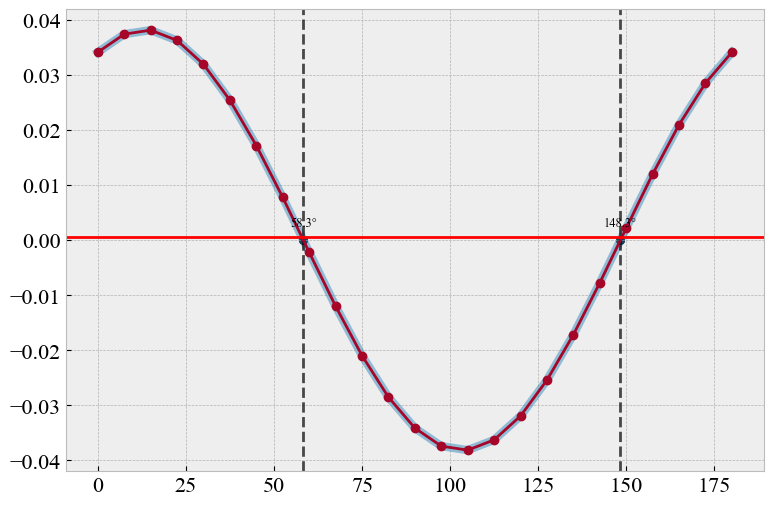

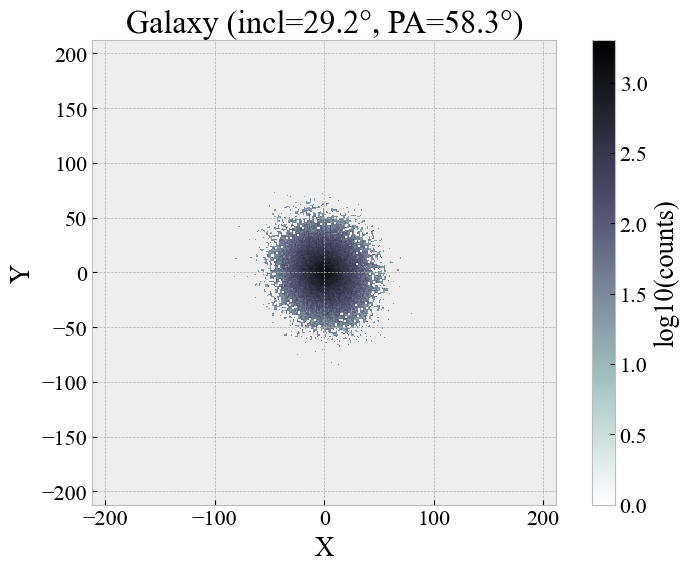

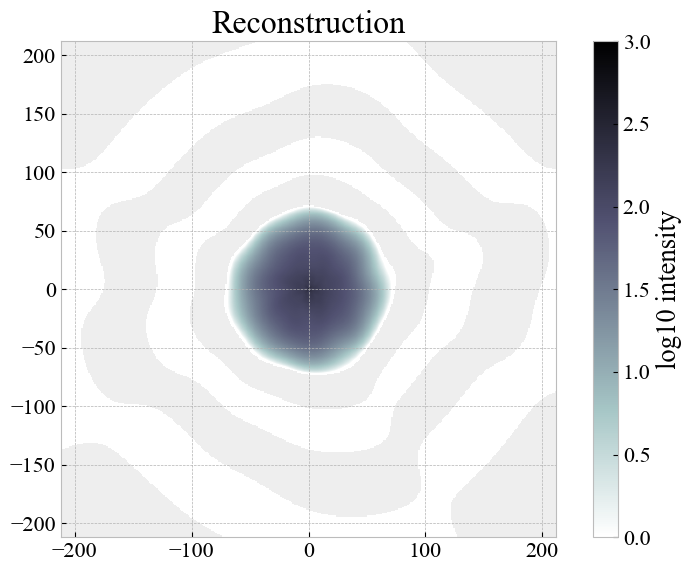

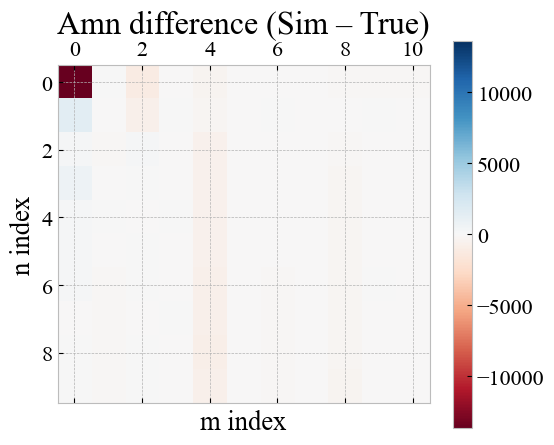

In [ ]:
incl_list = np.linspace(0, 85, 60)     # eight sample inclinations
PA_list   = np.linspace(0, 180, 25)     # fine PA sampling
colorindx = np.linspace(0, 1, len(incl_list+1))  # color index for inclinations
fig, ax = plt.subplots(figsize=(9,6))
import matplotlib as mpl

i=0
""" eta_avg_list=[]
A_fit_list = [] 
B_fit_list = [] 
C_fit_list = [] 
D_fit_list = []
for inc in tqdm(incl_list, desc="Processing inclinations"):
    # Build eta_cos vs PA
    eta_cos_list = []
    for PA in PA_list:
        D = DiscGalaxy(N=N, a=a, M=np.sum(gray))
        D.rotate_disc(inc, 0, PA)
        D.generate_image(rmax=rmax, nbins=h, noiselevel=noise)
        E = D.make_pointexpansion(mmax, nmax, a)

        coscoefs = E.coscoefs
        denom    = sum(np.abs(coscoefs[0, n]) for n in range(nmax)) or np.nan
        num_cos  = sum(coscoefs[2, n] for n in range(nmax))
        eta_cos  = num_cos / denom
        eta_cos_list.append(eta_cos)

    eta_arr = np.array(eta_cos_list)
    eta_avg_list.append(np.nanmean(eta_arr))
    ax.plot(PA_list, eta_arr, '-',  color=my_gradient(inc/incl_list.max()),
             label=f"{inc:.0f}° data")
    # Data‑driven initial guess
    if inc!=0:
        A0 = 0.5 * (np.nanmax(eta_arr) - np.nanmin(eta_arr))
        B0, C0 = 1.0, 0.0
        D0 = np.nanmean(eta_arr)
        initial_guess = [A0, B0, C0, D0]

        # Define fit model
        def cos_model(PA, A, B, C, D):
            return A * inc * np.cos(B * np.radians(PA) + C) + D

        # fit
        params, _ = curve_fit(cos_model, PA_list, eta_arr, p0=initial_guess,maxfev=5000)
        A_fit, B_fit, C_fit, D_fit = params
        A_fit_list.append(A_fit)
        B_fit_list.append(B_fit)
        C_fit_list.append(C_fit)
        D_fit_list.append(D_fit)

        # Plot data + model
        
        ax.plot(PA_list, cos_model(PA_list, *params), color=my_gradient(inc/incl_list.max()), linewidth=6, alpha=0.5,
                label=f"{inc:.0f}° fit")

    #print(f"inc={inc:.0f}° → A={A_fit:.3f}, B={B_fit:.3f}, C={C_fit:.3f}, D={D_fit:.3f}")
norm = mpl.colors.Normalize(vmin=incl_list.min(), vmax=incl_list.max())
sm   = mpl.cm.ScalarMappable(cmap=my_gradient, norm=norm)
sm.set_array([])  # dummy array for the mappable

# add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Inclination (°)')

# finish the rest of the formatting:
ax.set_xlabel("PA (°)")
ax.set_ylabel(r"$\eta_{\cos}$")
ax.grid(True)
ax.set_title(r"$\eta_{\cos}$ vs PA with sinusoidal fits")
plt.show() """
# Using the fitted parameters to estimate the inclination from the blind test data
eta_bt_sim = []
eta_cos_bt_sim = []

for PA in PA_list:
    D = DiscGalaxy(N=N, a=a, M=np.sum(gray))
    D.rotate_disc(inc_bt, 0, PA)
    D.generate_image(rmax=rmax, nbins=h, noiselevel=noise)
    E = D.make_pointexpansion(mmax, nmax, a)

    cosc = E.coscoefs; sinc = E.sincoefs
    denom = sum(np.abs(cosc[0,n]) for n in range(nmax)) or np.nan
    num   = sum(np.sqrt(cosc[2,n]**2 + sinc[2,n]**2) for n in range(nmax))
    num_cos = sum(cosc[2,n] for n in range(nmax))

    eta_bt_sim.append(num/denom)
    eta_cos_bt_sim.append(num_cos/denom)

eta_bt_sim      = np.array(eta_bt_sim)
eta_cos_bt_sim  = np.array(eta_cos_bt_sim)
pa_bt_sim       = PA_list

""" dist = np.sqrt((eta_bt_sim - eta_bt)**2 + (eta_cos_bt_sim - eta_cos_bt)**2)
best_idx = np.argmin(dist)
best_PA  = pa_bt_sim[best_idx] """


initial_guess = [-0.00001, 2.0, 2*np.pi, 0.0001]

# Define fit model
def cos_model(PA, A, B, C, D):
    return A * inc * np.cos(B * np.radians(PA) + C) + D

# fit
params_bt, _ = curve_fit(cos_model, PA_list, eta_cos_bt_sim, p0=initial_guess,maxfev=5000)
A_fit_bt, B_fit_bt, C_fit_bt, D_fit_bt = params_bt
plt.plot(PA_list, cos_model(PA_list, *params_bt),linewidth=6, alpha=0.5)


PA=1/B_fit_bt*(np.arccos(np.clip((eta_cos_bt - D_fit_bt) / A_fit_bt, -1.0, 1.0)) - C_fit_bt)
PA = np.rad2deg(PA)        
if PA > 180:             
    PA = 360 - PA       

# now PA ∈ [0,180]
if eta_sin_bt >= 0:
    # force into [0,90]
    if PA > 90:
        best_PA = 180 - PA
else:
    # force into [90,180]
    if PA < 90:
        best_PA = 180 - PA

print(f"Estimated PA from blind test: {PA},{best_PA:.1f} for eta_cos={eta_cos_bt:.3f}, eta_sin={eta_sin_bt:.3f}")

# Plot blind‐test point on previous fit-curve plot
y_fit = cos_model(PA_list, *params_bt)
zeros = []
for i in range(len(PA_list)-1):
    y0, y1 = y_fit[i], y_fit[i+1]
    if y0 == 0:
        zeros.append(PA_list[i])
    elif y0 * y1 < 0:
        #  Linear interpolation for the root
        PA0, PA1 = PA_list[i], PA_list[i+1]
        PA_zero = PA0 - y0 * (PA1 - PA0) / (y1 - y0)
        zeros.append(PA_zero)

#  Plot vertical lines (and optional labels) at each zero crossing
for z in zeros:
    plt.axvline(z, color='k', linestyle='--', alpha=0.7)
    plt.scatter([z], [0], color='k')  # marker at the intersection
    plt.text(z, 0.002, f"{z:.1f}°", ha='center', va='bottom', fontsize=9)

if eta_sin_bt >= 0:
    best_PA=min(zeros)
else:
    best_PA=max(zeros)
plt.plot(PA_list, eta_cos_bt_sim, 'o-', label="simulated (blind-test)")
plt.axhline(y=eta_cos_bt, color='r', linestyle='-')
plt.show()

D = DiscGalaxy(N=N, a=a, M=np.sum(gray))
D.rotate_disc(inc_bt, 0, best_PA)
D.generate_image(rmax=rmax, nbins=h, noiselevel=noise)
img = D.img
log_img = np.log10(np.where(img>0, img, np.nan))

plt.figure(figsize=(8,6))
plt.imshow(log_img, cmap='bone_r',
           extent=[D.x_edges[0], D.x_edges[-1],
                   D.y_edges[0], D.y_edges[-1]],
           vmin=0, vmax=3.3)
plt.colorbar(label='log10(counts)')
plt.title(f"Galaxy (incl={inc_bt:.1f}°, PA={best_PA:.1f}°)")
plt.xlabel("X"); plt.ylabel("Y")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,6))
plt.imshow(np.log10(np.where(recon_img>0, recon_img, np.nan)), cmap='bone_r',
           extent=[x_edges[0], x_edges[-1],
                   y_edges[0], y_edges[-1]],
           vmin=0, vmax=3)
plt.colorbar(label='log10 intensity')
plt.title("Reconstruction")
plt.tight_layout()
plt.show()


E_true = D.make_expansion(mmax, nmax, a, noisy=False)
Amn_true   = np.sqrt(E_true.coscoefs**2 + E_true.sincoefs**2).T
# assuming Amn_matrix is expansion from the real image
diff = Amn_matrix - Amn_true
limit = np.max(np.abs(diff))
norm  = colors.TwoSlopeNorm(vmin=-limit, vcenter=0, vmax=limit)

plt.figure(figsize=(6,5))
plt.matshow(diff, norm=norm, cmap='RdBu', fignum=1)
plt.colorbar()
plt.title("Amn difference (Sim – True)")
plt.xlabel("m index"); plt.ylabel("n index")
plt.show()

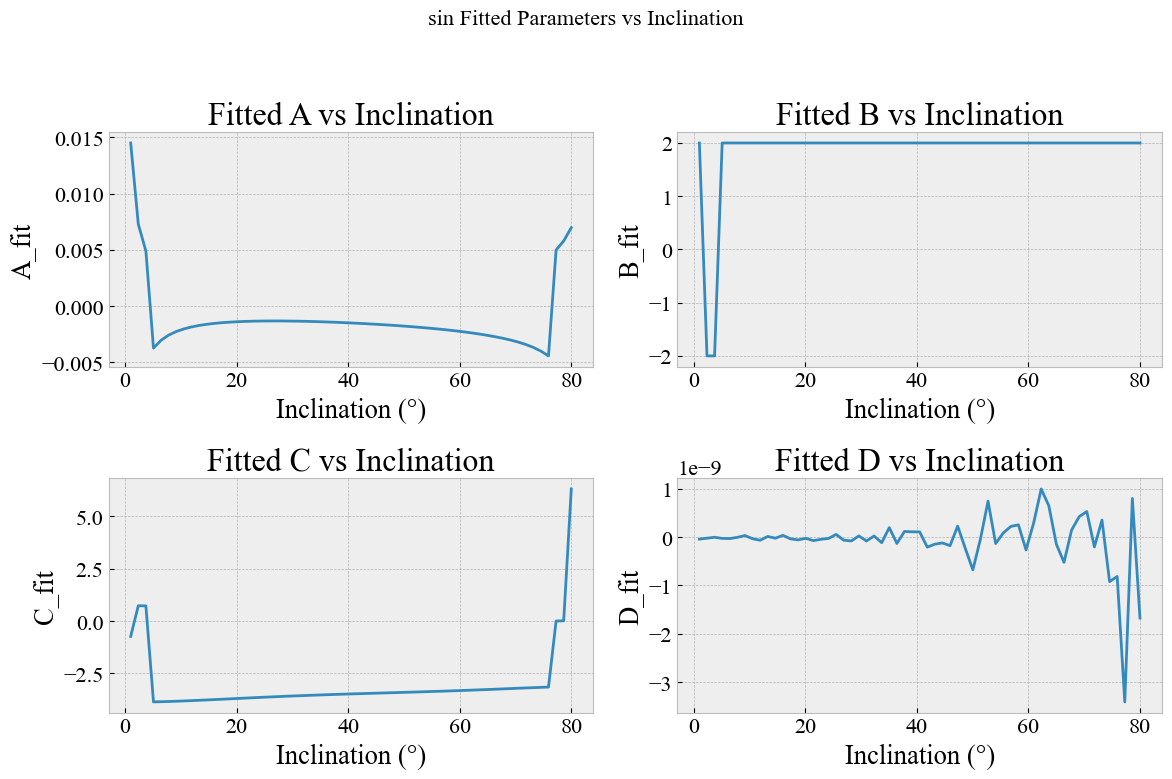

In [ ]:


import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('sin Fitted Parameters vs Inclination', fontsize=16)
incl_list = np.linspace(1, 80, 59)
# Plot A_fit
axs[0, 0].plot(incl_list, A_fit_list)
axs[0, 0].set_xlabel('Inclination (°)')
axs[0, 0].set_ylabel('A_fit')
axs[0, 0].set_title('Fitted A vs Inclination')
axs[0, 0].grid(True)

# Plot B_fit
axs[0, 1].plot(incl_list, B_fit_list)
axs[0, 1].set_xlabel('Inclination (°)')
axs[0, 1].set_ylabel('B_fit')
axs[0, 1].set_title('Fitted B vs Inclination')
axs[0, 1].grid(True)

# Plot C_fit
axs[1, 0].plot(incl_list, C_fit_list)
axs[1, 0].set_xlabel('Inclination (°)')
axs[1, 0].set_ylabel('C_fit')
axs[1, 0].set_title('Fitted C vs Inclination')
axs[1, 0].grid(True)

# Plot D_fit
axs[1, 1].plot(incl_list, D_fit_list)
axs[1, 1].set_xlabel('Inclination (°)')
axs[1, 1].set_ylabel('D_fit')
axs[1, 1].set_title('Fitted D vs Inclination')
axs[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

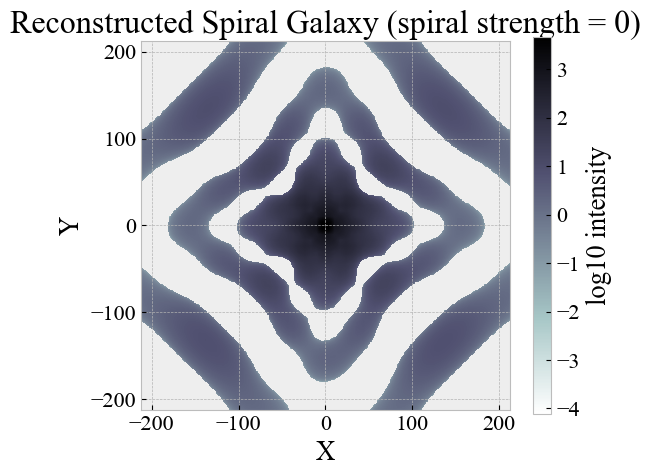

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.ndimage import zoom

def make_spiral_coefficients(base_E, spiral_strength=0.0):
    """
    Modify Laguerre coefficients to inject m=2 and m=4 spiral structure.
    spiral_strength: float in [0, 10] — 0 = no spiral, 10 = strong spiral.
    Returns modified (coscoefs, sincoefs)
    """
    coscoefs = base_E.coscoefs.copy()
    sincoefs = base_E.sincoefs.copy()

    strength_scale = spiral_strength / 10.0
    m_modes = [2, 4]  # Spiral-related modes

    for m in m_modes:
        boost = strength_scale * np.abs(base_E.coscoefs[0, :])
        coscoefs[m, :] += boost
        sincoefs[m, :] += 0.1 * boost  # small twist

    return coscoefs, sincoefs


# Parameters 
spiral_strength = 0  # in range [0–10]
target_shape = disc_only.shape  # e.g., (424, 424)
inc=0
PA=0
# Generate Base Galaxy 
D = DiscGalaxy(N=N, a=a, M=np.sum(gray))
D.rotate_disc(inc, 0, PA)
D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)

# Base Laguerre Expansion 
E_base = D.make_expansion(mmax, nmax, a * 1.5, noisy=False)

# Inject Spiral Coefficients 
coscoefs, sincoefs = make_spiral_coefficients(E_base, spiral_strength=spiral_strength)

# Apply Spiral Coefficients and Reconstruct
E_spiral = D.make_expansion(mmax, nmax, a * 1.5, noisy=False)
E_spiral.coscoefs = coscoefs
E_spiral.sincoefs = sincoefs
E_spiral.laguerre_reconstruction(D.r, D.p)

# Upsample to Match Image Grid 
recon_lowres = E_spiral.reconstruction  # shape e.g. (64, 64)
scale_x = target_shape[0] / recon_lowres.shape[0]
scale_y = target_shape[1] / recon_lowres.shape[1]
recon_upsampled = zoom(recon_lowres, (scale_x, scale_y), order=1)

# Plot the Upsampled Spiral Reconstruction
plt.figure(figsize=(6, 5))
plt.imshow(np.log10(np.where(recon_upsampled > 0, recon_upsampled, np.nan)),
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
           cmap='bone_r')
plt.colorbar(label='log10 intensity')
plt.title(f"Reconstructed Spiral Galaxy (spiral strength = {spiral_strength})")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()


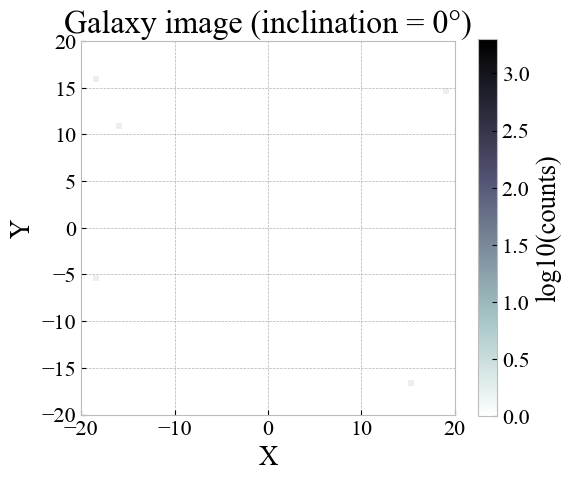

Amn inc= 0 (rows = n, columns = m):
[[0.011 0.    0.    0.    0.    0.    0.   ]
 [0.003 0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


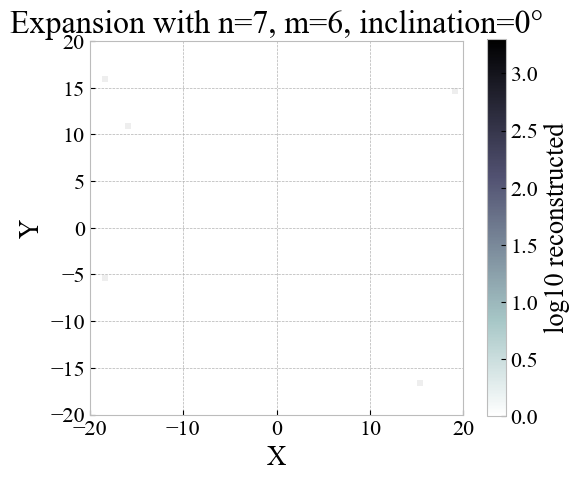

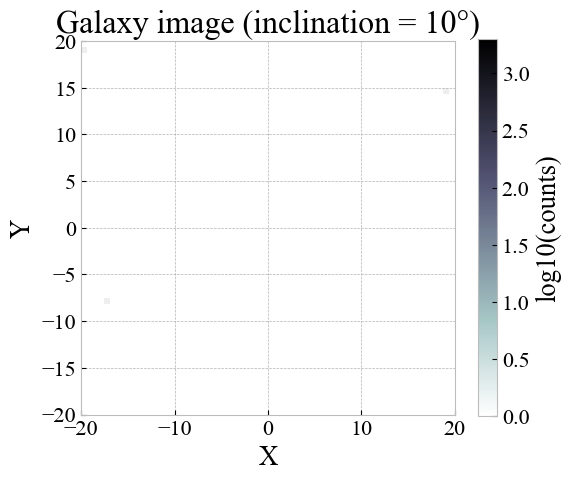

Amn inc= 10 (rows = n, columns = m):
[[0.011 0.    0.    0.    0.    0.    0.   ]
 [0.003 0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


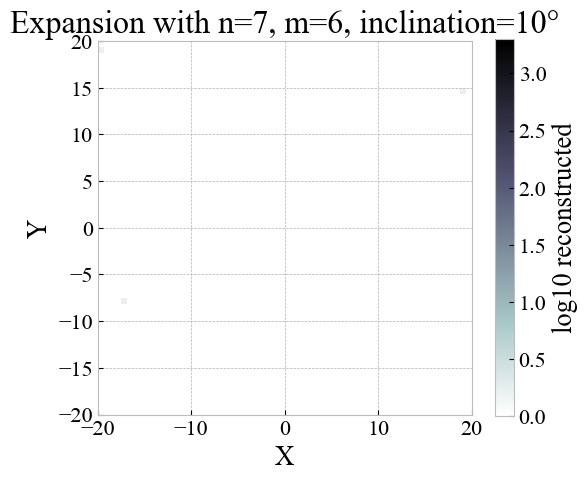

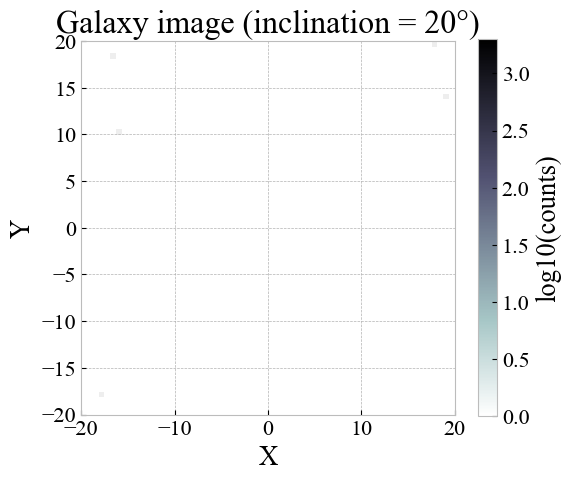

Amn inc= 20 (rows = n, columns = m):
[[0.011 0.    0.    0.    0.    0.    0.   ]
 [0.003 0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


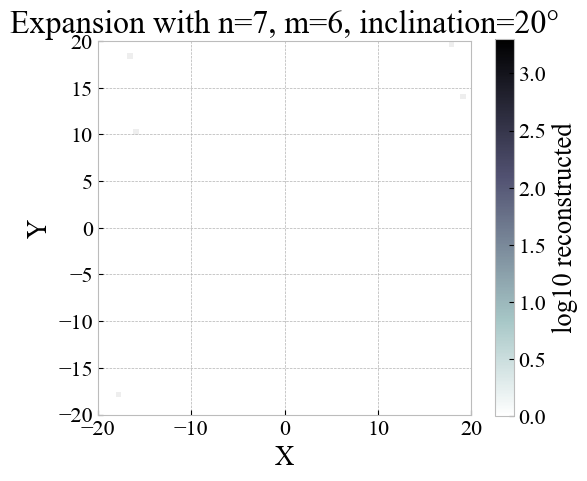

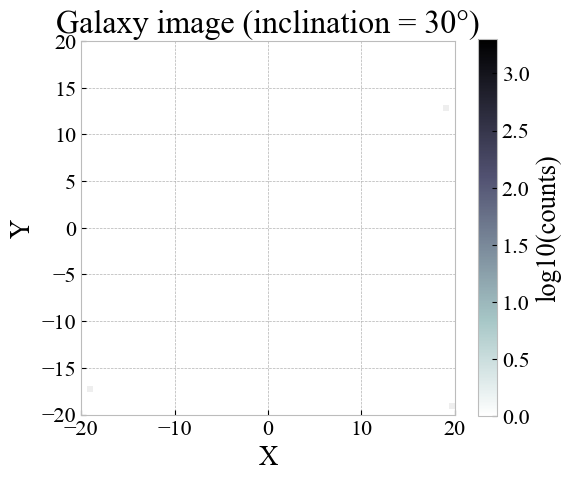

Amn inc= 30 (rows = n, columns = m):
[[0.012 0.    0.001 0.    0.    0.    0.   ]
 [0.004 0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


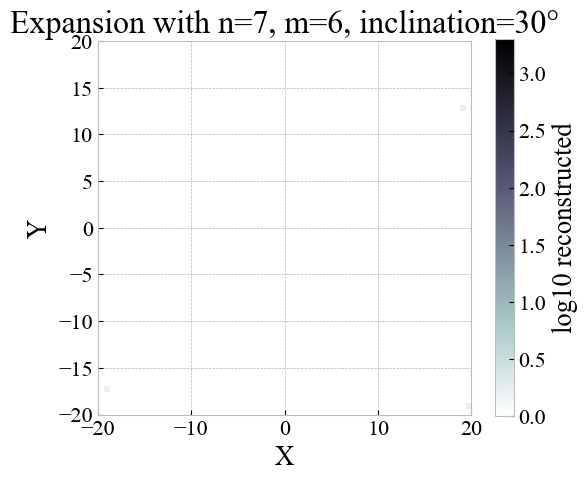

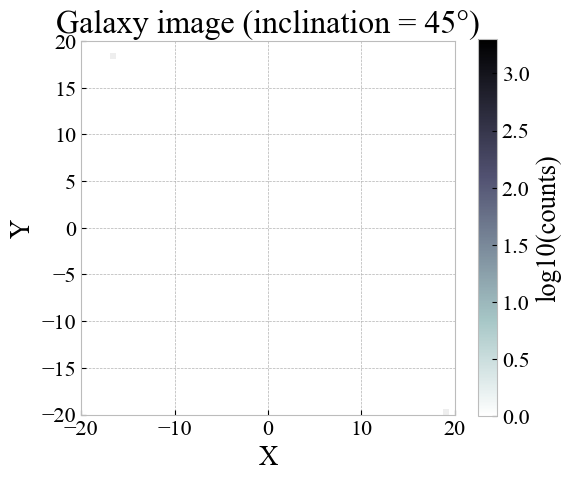

Amn inc= 45 (rows = n, columns = m):
[[0.012 0.    0.003 0.    0.    0.    0.   ]
 [0.005 0.    0.    0.    0.    0.    0.   ]
 [0.002 0.    0.001 0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


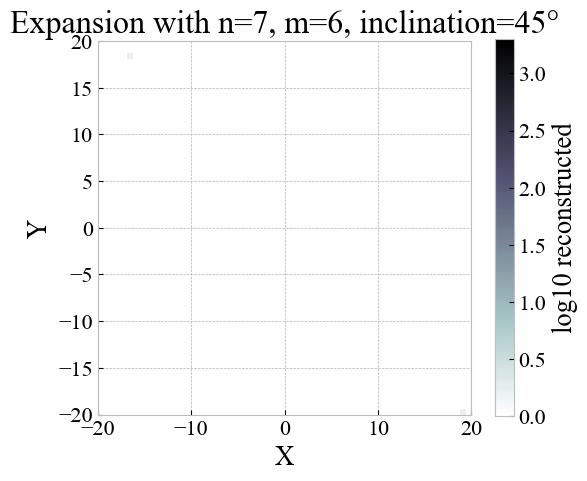

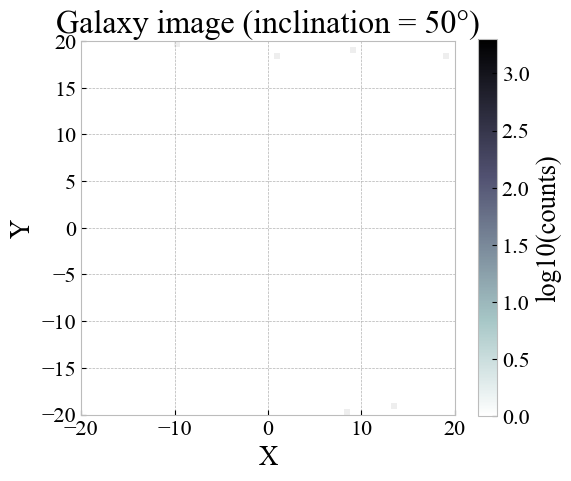

Amn inc= 50 (rows = n, columns = m):
[[0.013 0.    0.004 0.    0.    0.    0.   ]
 [0.005 0.    0.    0.    0.    0.    0.   ]
 [0.002 0.    0.001 0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


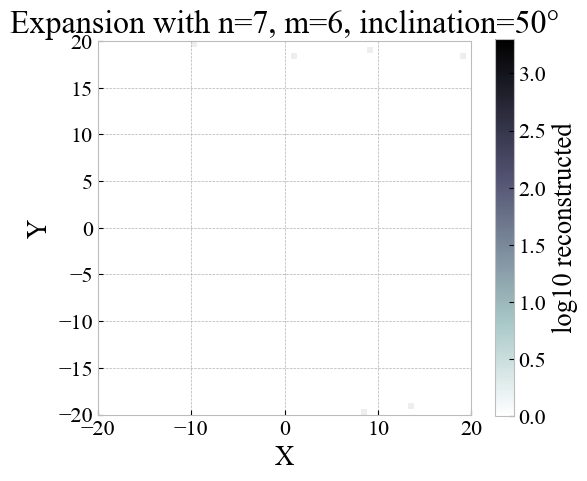

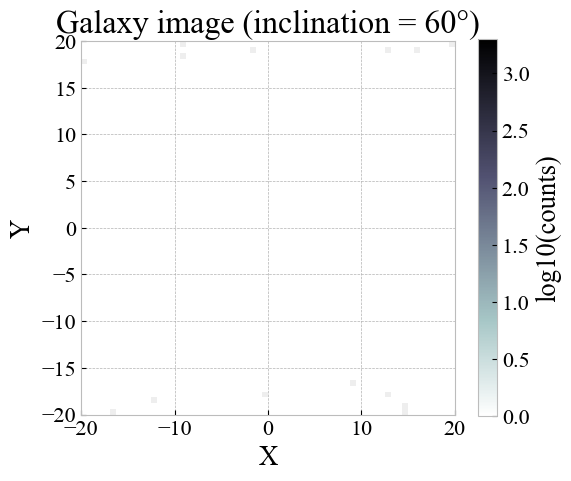

Amn inc= 60 (rows = n, columns = m):
[[0.013 0.    0.006 0.    0.001 0.    0.   ]
 [0.007 0.    0.    0.    0.001 0.    0.   ]
 [0.003 0.    0.001 0.    0.001 0.    0.   ]
 [0.001 0.    0.001 0.    0.    0.    0.   ]
 [0.001 0.    0.001 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


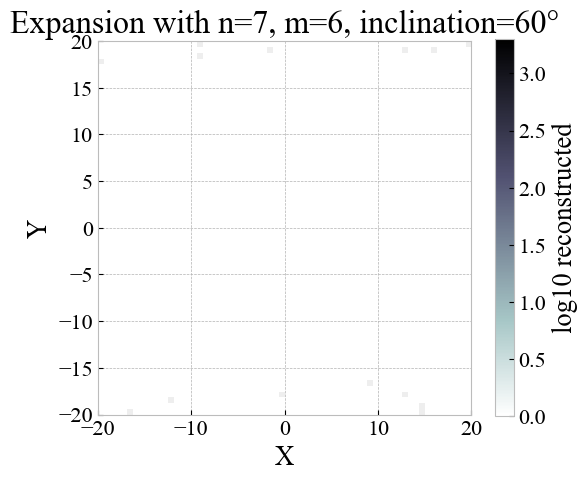

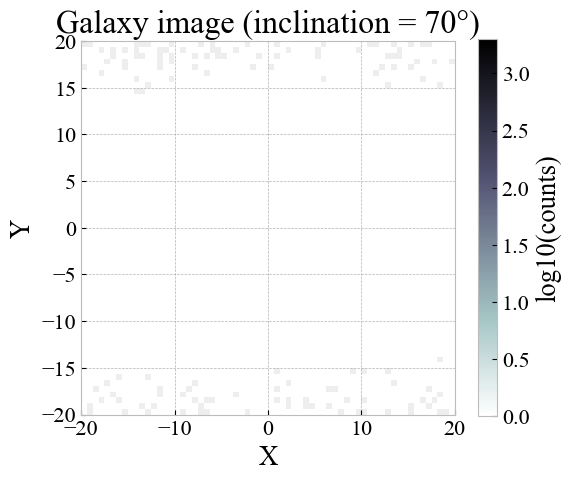

Amn inc= 70 (rows = n, columns = m):
[[0.014 0.    0.011 0.    0.004 0.    0.002]
 [0.008 0.    0.002 0.    0.    0.    0.001]
 [0.005 0.    0.001 0.    0.001 0.    0.001]
 [0.003 0.    0.001 0.    0.001 0.    0.   ]
 [0.002 0.    0.001 0.    0.    0.    0.   ]
 [0.001 0.    0.001 0.    0.    0.    0.   ]
 [0.001 0.    0.001 0.    0.    0.    0.   ]]


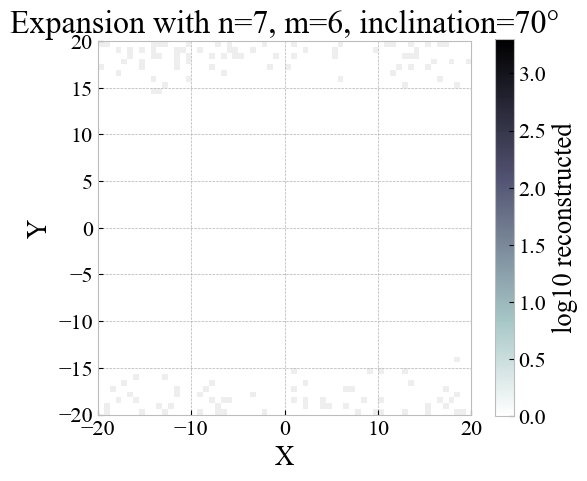

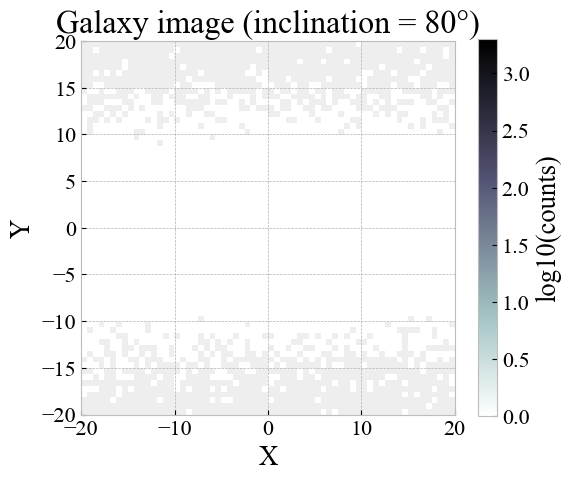

Amn inc= 80 (rows = n, columns = m):
[[0.015 0.    0.018 0.    0.011 0.    0.007]
 [0.01  0.    0.007 0.    0.002 0.    0.   ]
 [0.007 0.    0.002 0.    0.001 0.    0.001]
 [0.005 0.    0.    0.    0.001 0.    0.001]
 [0.004 0.    0.001 0.    0.001 0.    0.001]
 [0.003 0.    0.001 0.    0.001 0.    0.   ]
 [0.002 0.    0.001 0.    0.001 0.    0.   ]]


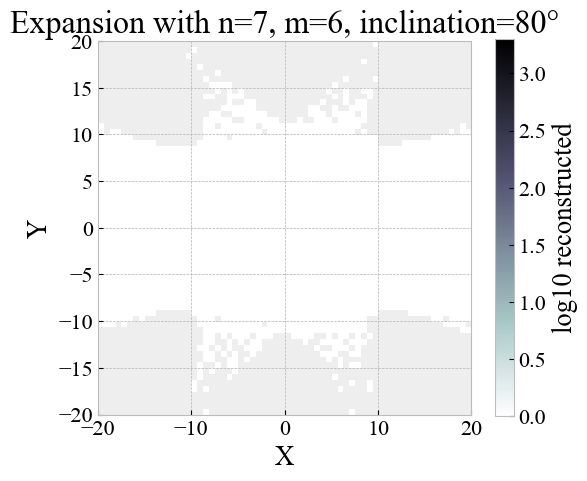

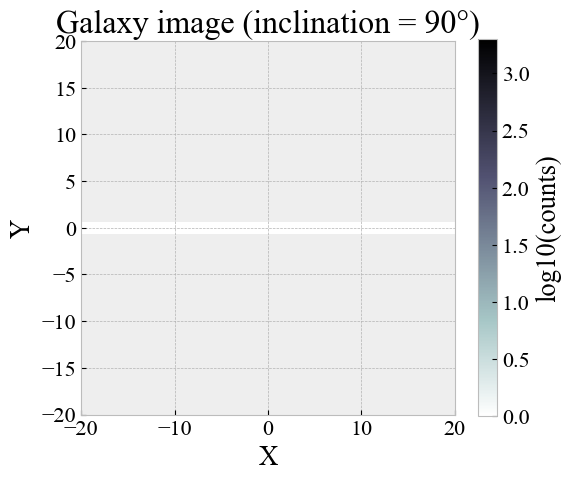

Amn inc= 90 (rows = n, columns = m):
[[0.016 0.    0.032 0.    0.032 0.    0.032]
 [0.012 0.    0.023 0.    0.023 0.    0.023]
 [0.009 0.    0.018 0.    0.018 0.    0.018]
 [0.008 0.    0.015 0.    0.015 0.    0.015]
 [0.007 0.    0.013 0.    0.013 0.    0.013]
 [0.006 0.    0.012 0.    0.012 0.    0.012]
 [0.006 0.    0.011 0.    0.011 0.    0.011]]


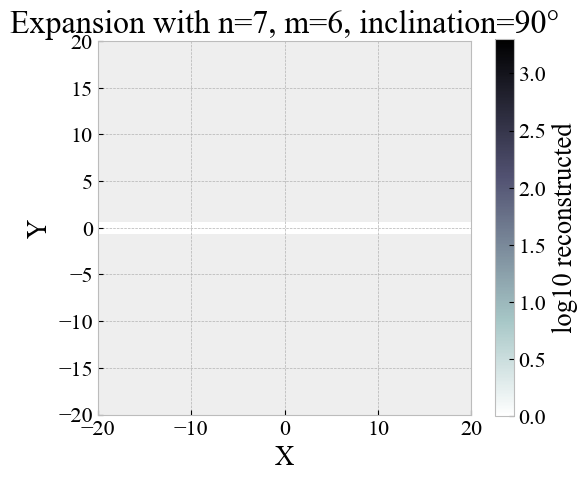

In [ ]:
rmax=20

inc = [0,10,20,30,45,50,60,70,80,90] # degrees, change as needed

for inc in inc:
    """Generating the galaxy image with the specified inclination"""
    D = DiscGalaxy(N=N, a=a)  # adjust N and a as needed
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    img_orig = D.img.copy()

    

    safe_img = np.where(D.img > 0, D.img, np.nan)
    log_img = np.log10(safe_img)


    """Plotting the galaxy image"""

    plt.figure(figsize=(6, 5))
    plt.imshow(log_img, origin='lower', cmap='bone_r',
            extent=[D.x_edges[0], D.x_edges[-1], D.y_edges[0], D.y_edges[-1]],
            vmin=0., vmax=3.3)
    plt.colorbar(label='log10(counts)')
    plt.title(f"Galaxy image (inclination = {inc}°)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.tight_layout()
    plt.show()


    m,n=6,7 #Toggle this to see the expansion coefficients and how they change, goal: find the closest match to the image

    E1 = D.make_pointexpansion(m,n,a*1.5,noisy=False) # Expanding the image 
    c = E1.coscoefs; s = E1.sincoefs
    Amn = np.sqrt(E1.coscoefs**2 +E1.sincoefs**2) 
    Amn_matrix = Amn.T 
    print(f"Amn inc= {inc} (rows = n, columns = m):")
    print(np.round(Amn_matrix,3)) 
    
    """Reconstruct an image from the expansion coefficients"""

    E1.laguerre_reconstruction(D.r,D.p)

    x , y= D.r * np.cos(D.p), D.r * np.sin(D.p) # Convert polar coordinates to Cartesian coordinates

    bins = [D.x_edges, D.y_edges]

    recon_img, _, _ = np.histogram2d(x, y, bins=bins, weights=E1.reconstruction)
    counts, _, _ = np.histogram2d(x, y, bins=bins)
    recon_img /= np.maximum(counts, 1)
    recon_img *= np.sum(img_orig) / np.sum(recon_img)
    recon_img = recon_img.T

    safe_recon = np.where(recon_img > 0, recon_img, np.nan)
    log_recon = np.log10(safe_recon)

    """Plotting the reconstructed image"""

    plt.figure(figsize=(6, 5))
    plt.imshow(log_recon, origin='lower', cmap='bone_r',
            extent=[D.x_edges[0], D.x_edges[-1], D.y_edges[0], D.y_edges[-1]],
            vmin=0., vmax=3.3)
    plt.colorbar(label='log10 reconstructed')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Expansion with n={n}, m={m}, inclination={inc}°')
    plt.tight_layout()
    plt.show()

  


In [ ]:
"""Saving the images and Amn matrices for different inclinations for Sonification video"""

inc_list = [0,10,20,30,45,50,60,70,80,90]
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

for inc in inc_list:
    # — Generate the galaxy & log image —
    D = DiscGalaxy(N=N, a=a)
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    img_orig = D.img.copy()
    safe_img = np.where(D.img > 0, D.img, np.nan)
    log_img  = np.log10(safe_img)

    # — Save the original log-image —
    fig = plt.figure(figsize=(6,5))
    plt.imshow(log_img, origin='lower', cmap='bone_r',
               extent=[D.x_edges[0], D.x_edges[-1],
                       D.y_edges[0], D.y_edges[-1]],
               vmin=0., vmax=3.3)
    plt.colorbar(label='log10(counts)')
    plt.title(f"Galaxy (inc={inc}°)")
    plt.xlabel("X"); plt.ylabel("Y")
    
    plt.tight_layout()
    fn1 = os.path.join(output_dir, f"galaxy_inc{inc:02d}_orig.png")
    plt.savefig(fn1, dpi=300)
    plt.close(fig)

    # — Compute & save the Amn matrix —
    m, n = 6, 7
    E1 = D.make_pointexpansion(m, n, a*1.5, noisy=False)
    Amn_matrix = np.sqrt(E1.coscoefs**2 + E1.sincoefs**2).T
    # save as text (tab- or comma-delimited)
    fn_npy = os.path.join(output_dir, f"Amn_inc{inc:02d}.npy")
    np.save(fn_npy, Amn_matrix)
    print(f"Saved Amn matrix for inc={inc}° to {fn_npy}")

    print(f"Saved Amn matrix for inc={inc}° to {fn_npy}")

    # — Reconstruct & save the reconstructed log-image —
    E1.laguerre_reconstruction(D.r, D.p)
    x, y = D.r*np.cos(D.p), D.r*np.sin(D.p)
    bins = [D.x_edges, D.y_edges]
    recon_img, _, _ = np.histogram2d(x, y, bins=bins, weights=E1.reconstruction)
    counts,    _, _ = np.histogram2d(x, y, bins=bins)
    recon_img /= np.maximum(counts, 1)
    recon_img *= np.sum(img_orig) / np.sum(recon_img)
    recon_img = recon_img.T
    safe_recon = np.where(recon_img > 0, recon_img, np.nan)
    log_recon  = np.log10(safe_recon)

    fig = plt.figure(figsize=(6,5))
    plt.imshow(log_recon, origin='lower', cmap='bone_r',
               extent=[D.x_edges[0], D.x_edges[-1],
                       D.y_edges[0], D.y_edges[-1]],
               vmin=0., vmax=3.3)
    plt.colorbar(label='log10 reconstructed')
    plt.title(f"Reconstruction (inc={inc}°)")
    plt.xlabel("X"); plt.ylabel("Y")
    plt.tight_layout()
    fn3 = os.path.join(output_dir, f"galaxy_inc{inc:02d}_recon.png")
    plt.savefig(fn3, dpi=300)
    plt.close(fig)


Saved Amn matrix for inc=0° to outputs/Amn_inc00.npy
Saved Amn matrix for inc=0° to outputs/Amn_inc00.npy
Saved Amn matrix for inc=10° to outputs/Amn_inc10.npy
Saved Amn matrix for inc=10° to outputs/Amn_inc10.npy
Saved Amn matrix for inc=20° to outputs/Amn_inc20.npy
Saved Amn matrix for inc=20° to outputs/Amn_inc20.npy
Saved Amn matrix for inc=30° to outputs/Amn_inc30.npy
Saved Amn matrix for inc=30° to outputs/Amn_inc30.npy
Saved Amn matrix for inc=45° to outputs/Amn_inc45.npy
Saved Amn matrix for inc=45° to outputs/Amn_inc45.npy
Saved Amn matrix for inc=50° to outputs/Amn_inc50.npy
Saved Amn matrix for inc=50° to outputs/Amn_inc50.npy
Saved Amn matrix for inc=60° to outputs/Amn_inc60.npy
Saved Amn matrix for inc=60° to outputs/Amn_inc60.npy
Saved Amn matrix for inc=70° to outputs/Amn_inc70.npy
Saved Amn matrix for inc=70° to outputs/Amn_inc70.npy
Saved Amn matrix for inc=80° to outputs/Amn_inc80.npy
Saved Amn matrix for inc=80° to outputs/Amn_inc80.npy
Saved Amn matrix for inc=90° t